In [ ]:
from google.colab import drive
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tamirpuzanov/road-signs-classification

 98% 410M/420M [00:02<00:00, 163MB/s]
100% 420M/420M [00:02<00:00, 167MB/s]


In [ ]:
%ls
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/7_11/c8951216-639b-4d91-bf9f-bd2c25380864.png  
  inflating: dataset/train/7_11/c946d3f7-e97b-4c77-b5a9-cb942bc3fe2f.png  
  inflating: dataset/train/7_11/c94d060a-94f0-4c21-aadb-5cb42406f6f3.png  
  inflating: dataset/train/7_11/ca3b5d97-442b-419b-a085-9421eca33279.png  
  inflating: dataset/train/7_11/ca80fe29-387e-4aad-99cc-8d9382669f6b.png  
  inflating: dataset/train/7_11/cb5f9de1-570c-4c70-b680-762b63fe2a4e.png  
  inflating: dataset/train/7_11/cc370565-9a17-4eeb-9547-85cd40d6acf1.png  
  inflating: dataset/train/7_11/cc52499e-acf6-4242-aa5c-e067c872aa2a.png  
  inflating: dataset/train/7_11/cdb77572-5f75-4d1b-9888-9a5cd2100ad5.png  
  inflating: dataset/train/7_11/ce33b7eb-ace9-44cd-87d4-22b54bc7429a.png  
  inflating: dataset/train/7_11/ce77e2b2-e064-4a1e-a908-0d02a6a8714c.png  
  inflating: dataset/train/7_11/d0bb1665-b7eb-4485-8cf3-80a271f9e77c.png  
  inflating: dataset/train/7_11/d1003440-b54f-4ac

In [ ]:
!nvidia-smi

Fri Jun 17 12:14:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model

In [ ]:
train_path = '/content/drive/MyDrive/datasets/dataset/train/'
test_path = '/content/drive/MyDrive/datasets/dataset/test/'

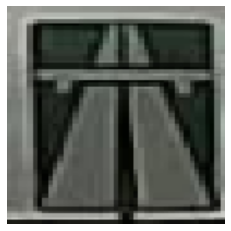

(100, 100, 3)


In [ ]:
img = load_img(train_path + "Autocesta/037b8446-0386-48f4-a3a1-05e4d8ea27f9.png", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

In [ ]:
batch_size = 50

train_generator = ImageDataGenerator().flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

test_generator = ImageDataGenerator().flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 44373 images belonging to 136 classes.
Found 11016 images belonging to 136 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(136, activation='softmax'))

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [ ]:
epochs = 50

In [ ]:
with tf.device('/gpu:0'):
  model.fit(
  x = train_generator,
  steps_per_epoch = 1600 // batch_size,
  epochs=epochs,
  validation_data = test_generator,
  validation_steps = 800 // batch_size)

Epoch 1/50
32/32 [==============================] - 535s 16s/step - loss: 21.4887 - accuracy: 0.0106 - val_loss: 4.7619 - val_accuracy: 0.0350
Epoch 2/50
32/32 [==============================] - 500s 16s/step - loss: 4.8993 - accuracy: 0.0200 - val_loss: 4.7599 - val_accuracy: 0.0362
Epoch 3/50
32/32 [==============================] - 473s 15s/step - loss: 4.7475 - accuracy: 0.0231 - val_loss: 4.8390 - val_accuracy: 0.0463
Epoch 4/50
32/32 [==============================] - 456s 14s/step - loss: 4.6262 - accuracy: 0.0606 - val_loss: 4.0325 - val_accuracy: 0.2062
Epoch 5/50
32/32 [==============================] - 437s 14s/step - loss: 4.0594 - accuracy: 0.1525 - val_loss: 3.1533 - val_accuracy: 0.3638
Epoch 6/50
32/32 [==============================] - 405s 13s/step - loss: 3.5572 - accuracy: 0.2281 - val_loss: 2.7103 - val_accuracy: 0.4875
Epoch 7/50
32/32 [==============================] - 378s 12s/step - loss: 3.0153 - accuracy: 0.3469 - val_loss: 2.0002 - val_accuracy: 0.6087
Epoch

In [ ]:
model.save('drive/MyDrive/datasets/model_fuzzy.h5')

In [ ]:
model.save('drive/MyDrive/datasets/model_fuzzy2.h5')

In [ ]:
model.save('drive/MyDrive/datasets/model_TPU.h5')

In [ ]:
model.save('drive/MyDrive/datasets/model_GTX960.h5')

In [ ]:
model1 = load_model('drive/MyDrive/datasets/model_fuzzy.h5')

In [ ]:
model2 = load_model('drive/MyDrive/datasets/model_fuzzy2.h5')

In [ ]:
test_img = load_img("/content/drive/MyDrive/datasets/right-turn-prohibited-road-sign-uk-2CBGK16.jpg", target_size=(100,100))
test_img_array = img_to_array(test_img)
test_img_expanded = np.expand_dims(test_img_array, axis = 0)

In [ ]:
prediction = model2.predict(test_img_expanded)
prediction = prediction.tolist()
prediction = prediction[0]
index = prediction.index(max(prediction))
print(index)

118


In [ ]:
labels = ["Autocesta", "Benzinska postaja", "Biciklisti na cesti", "Biciklistička staza", "Bolnica", "Brza cesta", "Brzina koja se preporucuje-40", "Brzina koja se preporucuje-50",
          "Brzina koja se preporucuje-60", "Brzina koja se preporucuje-70", "Brzina koja se preporucuje-80", "Cesta s prednošću prolaska", "Cesta s jednosmjernim prometom 1",
          "Cesta s jednosmjernim prometom 2", "Cesta s jednosmjernim prometom 3", "Divljac na cesti", "Djeca na cesti", "Domace zivotinje na cesti", "Dopusteni smjerovi lijevo i desno",
          "Dopusteni smjerovi naprijed i desno", "Dopusteni smjerovi naprijed i lijevo", "Dopusteno obilazenje", "Dvostruki zavoj ili vise uzastopnih zavoja od kojih je prvi udesno",
          "Dvostruki zavoj ili vise uzastopnih zavoja od kojih je prvi uljievo", "Hotel ili motel", "Izbocina na cesti", "Izmjenicno parkiranje 1", "Izmjenicno parkiranje 2",
          "Kamenje pada", "Kamenje prsti", "Kontrolna tocka za medunarodni cestovni prijevoz", "Kruzni tok prometa", "Nailazak na prometna svjetla", "Najmanja udaljenost izmedu vozila",
          "Neravan kolnik 1", "Neravan kolnik 2", "Obavezno zaustavljanje", "Obiljezen pjesacki prelaz 1", "Obiljezen pjesacki prelaz 2", "Obvezan smjer - desno 1", "Obvezan smjer - desno 2",
          "Obvezan smjer - lijevo 1", "Obvezan smjer - lijevo 2", "Obvezan smjer - naprijed", "Obvezno obilazenje s desne strane", "Obvezno obilazenje s lijeve strane", "obvezno zaustavljanje",
          "Ogranicenje brzine-110", "Ogranicenje brzine-40", "Ogranicenje brzine-50", "Ogranicenje brzine-60", "Ogranicenje brzine-70", "Ogranicenje brzine-80", "Ogranicenje brzine-90",
          "Opasna nizbrdica", "Opasna uzbrdica", "Opasnost na cesti", "Otvaranje prometne trake", "Parkiraliste 1", "Parkisraliste 2", "Pjesacka i biciklisticka staza 1", "Pjesacka i biciklisticka staza 2",
          "Pjesacka i biciklisticka staza 3", "Pjesacka staza", "Pjesacka zona", "Podrucje smirenog prometa", "Podzemni ili nadzemni pjesacki prelaz 1", "Podzemni ili nadzemni pjesacki prelaz 2",
          "Policija", "Praonica vozila", "Prednost prolaska prema vozilima iz suprotnog smjera", "Prednost prolaska za vozila iz suprotnog smjera", "Prestanak ogranicenja brzine-40",
          "Prestanak ogranicenja brzine-50", "Prestanak ogranicenja brzine-60", "Prestanak ogranicenja brzine-70", "Prestanak svih zabrana", "Prestanak zabrane pretjecanja svih motornih vozila",
          "Prijelaz ceste preko zeljeznicke pruge s branikom", "Promet u oba smjera", "Putna patrolna postaja", "Radionica za oporavak vozila", "Radovi na cesti", "Raskrizje s cestom koja ima prednost prolaza",
          "Raskrizje s kruznim tokom prometa", "Raskrizje sa sporednom cestom pod pravim kutom", "Restoran", "Sklizak kolnik", "Slijepa cesta 1", "Slijepa cesta 2", "Slijepa cesta 3",
          "Spajanje sporedne ceste pod pravim kutom", "Spajanje sporedne ceste sa lijeve strane", "Stajaliste autobusa", "Stajaliste tramvaja", "Suzenje ceste", "Suzenje ceste s desne strane",
          "Suzenje ceste s lijeve strane", "Taxi", "Telefon", "Teren ureden za izletnike", "Tramvajska pruga", "Tunel", "Ustanoca hitne medicinske pomoci", "WC", "Zabrana parkiranja", "Zabrana polukruznog okratanja",
          "Zabrana pretjecanja svih motornih vozila bez prikolice i mopeda", "Zabrana prolaska bez zaustavljanja", "Zabrana prometa u jednom smjeru", "Zabrana prometa u oba smjera",
          "Zabrana prometa za bicikle", "Zabrana prometa za mopede", "Zabrana prometa za pjesake", "Zabrana prometa za sva motorna vozila koja vuku prikljucno vozilo", "Zabrana prometa za teretne automobile",
          "Zabrana prometa za vozila koja prevoze eksploziv ili neke zapaljive tvari", "Zabrana prometa za vozila koja prevoze opasne tvari", "Zabrana skretanja udesno", "Zabrana skretanja ulijevo",
          "Zabrana zaustavljanja i parkiranja", "Zatvaranje prometne trake", "Zavoj udesno", "Zavoj ulijevo", "Zavrsetak autoceste", "Zavrsetak biciklisticke staze", "Zavrsetak brze ceste",
          "Zavrsetak ceste s prednoscu prolaska", "Zavrsetak ceste s jednosmjernim prometom", "Zavrsetak pjesacke i biciklisticke staze", "Zavrsetak podrucja smirenog prometa",
          "Zeljeznicka pruga", "Zona u kojoj je ogranicena brzine-20", "Zona u kojoj je ogranicena brzina-30", "Zona u kojoj je ogranicena brzina-40", "Zona u kojoj je ogranicena brzina-50"]

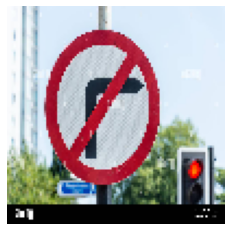

(100, 100, 3)


In [ ]:
img = load_img("/content/drive/MyDrive/datasets/right-turn-prohibited-road-sign-uk-2CBGK16.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

In [ ]:
predicted_image = labels[index]
print(predicted_image)

Zabrana skretanja udesno


In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 64)        36928     
                                                        

In [ ]:
print(tf.__version__)

2.8.2
